# <font color='black'><center><center></font> 
![title](img/All.png) 
# <font color='white'><center><center></font> 
# <font><center>Neural Networks & Deep Learning<center></font>
# <font ><center>HW3: Q1<center></font>
## <center>Teacher: Dr. Kalhor<center>
### <center>Mohammadali Shakerdargah <center>
### <center>810196487<center>

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

In [115]:
class Hebbian:
    def __init__(self, _S, _T):
        self.S = _S
        self.T = _T
        self.W = np.zeros((len(_S[1]), len(_T[1])))
        
    def train(self):
        for trainSample in range(len(self.S)):
            x = self.S[trainSample]
            y = self.T[trainSample]
            for i in range(len(x)):
                for j in range(len(y)):
                    self.W[i][j] = self.W[i][j] + x[i]*y[j]
                    
    def showResult(self, X):
        y_t = np.dot(X,self.W)
        for i in range(len(y_t)): #sign
            if(y_t[i] >= 0):
                y_t[i] = 1
            else:
                y_t[i] = -1
        plt.figure()
        plt.imshow(y_t.reshape((5, 3)), cmap='binary')
        
    def showResultWithNoise(self, _S_space, _T_space, n): # n% of values with noise
        T_space = copy.deepcopy(_T_space)
        rightAns = 0
        for i in range(1000):
            S_space = copy.deepcopy(_S_space)
            for sample in range(len(S_space)):
                toNoise = int(len(S_space[0])*(n/100))
                randomIndexes = random.sample(range(1, len(S_space[0])-1), toNoise)
                for index in randomIndexes:
                    if(S_space[sample][index] == 1):
                        S_space[sample][index] = -1
                    else:
                        S_space[sample][index] = 1
            Y_t_list = []
            for sample in range(len(S_space)):
                y_t_sample = np.dot(S_space[sample] ,self.W)
                for i in range(len(y_t_sample)): #sign
                    if(y_t_sample[i] >= 0):
                        y_t_sample[i] = 1
                    else:
                        y_t_sample[i] = -1
                Y_t_list.append(y_t_sample)
            Y_t_array = np.array(Y_t_list)
            if(np.array_equal(Y_t_array, T_space)): 
                rightAns += 1
        return ((rightAns/1000)*100)
        
    def showResultWithLost(self, _S_space, _T_space, n): # n% of values with noise
        T_space = copy.deepcopy(_T_space)
        rightAns = 0
        for i in range(1000):
            S_space = copy.deepcopy(_S_space)
            for sample in range(len(S_space)):
                toBeLost = int(len(S_space[0])*(n/100))
                randomIndexes = random.sample(range(1, len(S_space[0])-1), toBeLost)
                for index in randomIndexes:
                    S_space[sample][index] = 0
            Y_t_list = []
            for sample in range(len(S_space)):
                y_t_sample = np.dot(S_space[sample] ,self.W)
                for i in range(len(y_t_sample)): #sign
                    if(y_t_sample[i] >= 0):
                        y_t_sample[i] = 1
                    else:
                        y_t_sample[i] = -1
                Y_t_list.append(y_t_sample)
            Y_t_array = np.array(Y_t_list)
            if(np.array_equal(Y_t_array, T_space)): 
                rightAns += 1
        return ((rightAns/1000)*100)

In [116]:
A_s = np.array([   [-1, -1 , -1, 1, -1, -1, -1],
                   [-1, -1 , -1, 1, -1, -1, -1],
                   [-1, -1 , -1, 1, -1, -1, -1],
                   [-1, -1 , 1, -1, 1, -1, -1],
                   [-1, -1 , 1, -1, 1, -1, -1],
                   [-1, 1,   1,  1, 1,  1, -1],
                   [-1, 1,  -1, -1, -1, 1, -1],
                   [-1, 1,  -1, -1, -1, 1, -1],
                   [1,  1,   1, -1,  1, 1,  1]])

B_s = np.array([   [ 1,  1,  1,  1,  1,  1, 1],
                   [ 1, -1, -1, -1, -1, -1, 1],
                   [ 1, -1, -1, -1, -1,  1,-1],
                   [ 1, -1, -1, -1,  1, -1,-1],
                   [ 1,  1,  1,  1, -1, -1,-1],
                   [ 1, -1, -1, -1,  1, -1,-1],
                   [ 1, -1, -1, -1, -1,  1,-1],
                   [ 1, -1, -1, -1, -1, -1, 1],
                   [ 1,  1,  1,  1,  1,  1, 1]])

C_s = np.array([   [-1, -1,  1,  1,  1,  1,-1],
                   [-1,  1, -1, -1, -1, -1, 1],
                   [ 1, -1, -1, -1, -1, -1,-1],
                   [ 1, -1, -1, -1, -1, -1,-1],
                   [ 1, -1, -1, -1, -1, -1,-1],
                   [ 1, -1, -1, -1, -1, -1,-1],
                   [ 1, -1, -1, -1, -1, -1,-1],
                   [-1,  1, -1, -1, -1, -1, 1],
                   [-1, -1,  1,  1,  1,  1,-1]])

A_t = np.array([   [-1, 1, -1],
                   [ 1, -1, 1],
                   [ 1,  1, 1],
                   [ 1, -1, 1],
                   [ 1, -1, 1]])

B_t = np.array([   [ 1, 1, -1],
                   [ 1,-1,  1],
                   [ 1, 1, -1],
                   [ 1,-1,  1],
                   [ 1, 1, -1]])

C_t = np.array([   [-1, 1, 1],
                   [ 1,-1,-1],
                   [ 1,-1,-1],
                   [ 1,-1,-1],
                   [-1, 1, 1]])

A_s_reshaped = A_s.reshape((A_s.shape[0]*A_s.shape[1]))
B_s_reshaped = B_s.reshape((B_s.shape[0]*B_s.shape[1]))
C_s_reshaped = C_s.reshape((C_s.shape[0]*C_s.shape[1]))
A_t_teshaped = A_t.reshape((A_t.shape[0]*A_t.shape[1]))
B_t_teshaped = B_t.reshape((B_t.shape[0]*B_t.shape[1]))
C_t_teshaped = C_t.reshape((C_t.shape[0]*C_t.shape[1]))

S = np.array([copy.deepcopy(A_s_reshaped), copy.deepcopy(B_s_reshaped), copy.deepcopy(C_s_reshaped)])
T = np.array([copy.deepcopy(A_t_teshaped), copy.deepcopy(B_t_teshaped), copy.deepcopy(C_t_teshaped)])
heb = Hebbian(S, T)


# Part A

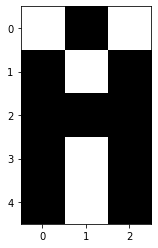

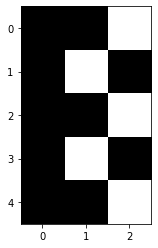

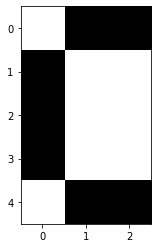

In [117]:
heb.train()
heb.showResult(A_s_reshaped)
heb.showResult(B_s_reshaped)
heb.showResult(C_s_reshaped)

# Part B

## Results of Inputs with 10% & 25% Noise 

In [118]:
n = 10
S_space = np.array([copy.deepcopy(A_s_reshaped), copy.deepcopy(B_s_reshaped), copy.deepcopy(C_s_reshaped)])        
T_space = np.array([copy.deepcopy(A_t_teshaped), copy.deepcopy(B_t_teshaped), copy.deepcopy(C_t_teshaped)])    
res = heb.showResultWithNoise(S_space,T_space, n)
print(res,"%")

100.0 %


In [119]:
n = 25
S_space = np.array([copy.deepcopy(A_s_reshaped), copy.deepcopy(B_s_reshaped), copy.deepcopy(C_s_reshaped)])        
T_space = np.array([copy.deepcopy(A_t_teshaped), copy.deepcopy(B_t_teshaped), copy.deepcopy(C_t_teshaped)])    
res = heb.showResultWithNoise(S_space,T_space, n)
print(res,"%")

92.4 %


## Results of Inputs with 10% & 25% Lost

In [120]:
n = 10
S_space = np.array([copy.deepcopy(A_s_reshaped), copy.deepcopy(B_s_reshaped), copy.deepcopy(C_s_reshaped)])        
T_space = np.array([copy.deepcopy(A_t_teshaped), copy.deepcopy(B_t_teshaped), copy.deepcopy(C_t_teshaped)])    
res = heb.showResultWithLost(S_space,T_space, n)
print(res,"%")

100.0 %


In [121]:
n = 25
S_space = np.array([copy.deepcopy(A_s_reshaped), copy.deepcopy(B_s_reshaped), copy.deepcopy(C_s_reshaped)])        
T_space = np.array([copy.deepcopy(A_t_teshaped), copy.deepcopy(B_t_teshaped), copy.deepcopy(C_t_teshaped)])    
res = heb.showResultWithLost(S_space,T_space, n)
print(res,"%")

100.0 %
